In [1]:
# Multilayer Perceptron (MLP)
# # Based on approach (Bengio et al. 2003): https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf
# https://www.youtube.com/watch?v=TCH_1BHY58I&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=3
# https://github.com/karpathy/nn-zero-to-hero/blob/master/lectures/makemore/makemore_part2_mlp.ipynb



In [58]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt 
%matplotlib inline

In [59]:
words = open('names.txt', 'r').read().splitlines()

In [60]:
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [61]:
len(words)

32033

In [62]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [68]:
block_size = 3

X, Y = [], []

for w in words[:5]:
    print(w)
    context = [0] * block_size
    #print(context)
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(f'{context} -> {ix}')
        print(''.join(itos[i] for i in context), '--->', itos[ix])
        #print(context[1:])
        #print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]
        #print(context[1:] +[ix])
        
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
[0, 0, 0] -> 5
... ---> e
[0, 0, 5] -> 13
..e ---> m
[0, 5, 13] -> 13
.em ---> m
[5, 13, 13] -> 1
emm ---> a
[13, 13, 1] -> 0
mma ---> .
olivia
[0, 0, 0] -> 15
... ---> o
[0, 0, 15] -> 12
..o ---> l
[0, 15, 12] -> 9
.ol ---> i
[15, 12, 9] -> 22
oli ---> v
[12, 9, 22] -> 9
liv ---> i
[9, 22, 9] -> 1
ivi ---> a
[22, 9, 1] -> 0
via ---> .
ava
[0, 0, 0] -> 1
... ---> a
[0, 0, 1] -> 22
..a ---> v
[0, 1, 22] -> 1
.av ---> a
[1, 22, 1] -> 0
ava ---> .
isabella
[0, 0, 0] -> 9
... ---> i
[0, 0, 9] -> 19
..i ---> s
[0, 9, 19] -> 1
.is ---> a
[9, 19, 1] -> 2
isa ---> b
[19, 1, 2] -> 5
sab ---> e
[1, 2, 5] -> 12
abe ---> l
[2, 5, 12] -> 12
bel ---> l
[5, 12, 12] -> 1
ell ---> a
[12, 12, 1] -> 0
lla ---> .
sophia
[0, 0, 0] -> 19
... ---> s
[0, 0, 19] -> 15
..s ---> o
[0, 19, 15] -> 16
.so ---> p
[19, 15, 16] -> 8
sop ---> h
[15, 16, 8] -> 9
oph ---> i
[16, 8, 9] -> 1
phi ---> a
[8, 9, 1] -> 0
hia ---> .


In [69]:
X.shape
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

#### Embedding Layer

 this layer maps input information from a high-dimensional to a lower-dimensional space, allowing the network to learn more about the relationship between inputs and to process the data more efficiently. 

In [70]:
C = torch.randn((27, 2))
print(C[20:27])
print(C[0])
print(X[27,2])
print(C[X][15])

print(C.shape)
print(X.shape)
print((C[X].shape))

tensor([[ 0.1898, -0.1083],
        [-0.4699, -0.6854],
        [ 1.7376, -0.6127],
        [-1.4263, -0.7965],
        [-0.1475,  0.4119],
        [ 0.7463,  1.8196],
        [ 1.6776, -1.3424]])
tensor([ 0.7009, -0.2686])
tensor(15)
tensor([[-1.8249, -0.9504],
        [ 1.7376, -0.6127],
        [-1.8249, -0.9504]])
torch.Size([27, 2])
torch.Size([32, 3])
torch.Size([32, 3, 2])


In [76]:
C[5]

tensor([[ 0.7009, -0.2686],
        [-1.8249, -0.9504],
        [-0.6016, -1.6448],
        [ 1.5415, -1.9305],
        [-1.1745,  1.0593],
        [-0.2370,  0.3787],
        [ 1.0737,  1.2631],
        [-0.3888, -0.7933],
        [ 0.1186,  1.0403],
        [ 0.0991, -0.7444],
        [ 0.0607, -0.4352],
        [-0.6169, -0.9193],
        [ 0.7509, -0.0385],
        [-0.7680, -0.2146],
        [-0.3294, -1.7512],
        [-1.1038, -2.5072],
        [ 2.6186,  1.0346],
        [ 0.6354, -0.5045],
        [-0.3985,  0.6628],
        [-0.9963,  0.2332],
        [ 0.1898, -0.1083],
        [-0.4699, -0.6854],
        [ 1.7376, -0.6127],
        [-1.4263, -0.7965],
        [-0.1475,  0.4119],
        [ 0.7463,  1.8196],
        [ 1.6776, -1.3424]])

In [77]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [72]:
# is equivalent to the the weight matrix: so this the first layer of this neural network is just coming from the weight matrix
F.one_hot(torch.tensor(5), num_classes=27).float() @ C 

tensor([-0.2370,  0.3787])

In [73]:
C[[5,6,7]]

tensor([[-0.2370,  0.3787],
        [ 1.0737,  1.2631],
        [-0.3888, -0.7933]])

In [74]:
# Relationship
print(X[14,2])
print(C[X][14,2])
print(C[22])
#print(C[X].shape)
#print(C[X])

tensor(22)
tensor([ 1.7376, -0.6127])
tensor([ 1.7376, -0.6127])


In [75]:
print(X.shape)
X

torch.Size([32, 3])


tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [15]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

#### Hidden Layer

In [16]:
W1 = torch.randn(6, 100) 
b1 = torch.randn(100) 

In [17]:
print(torch.cat([emb[: , 0, :], emb[: , 1, :], emb[: , 2, :]], dim=1).shape)
torch.cat([emb[: , 0, :], emb[: , 1, :], emb[: , 2, :]], dim=1)

torch.Size([32, 6])


tensor([[ 0.3770, -1.5054,  0.3770, -1.5054,  0.3770, -1.5054],
        [ 0.3770, -1.5054,  0.3770, -1.5054, -0.1563, -0.6074],
        [ 0.3770, -1.5054, -0.1563, -0.6074, -1.0999, -0.6497],
        [-0.1563, -0.6074, -1.0999, -0.6497, -1.0999, -0.6497],
        [-1.0999, -0.6497, -1.0999, -0.6497, -0.8968, -0.7919],
        [ 0.3770, -1.5054,  0.3770, -1.5054,  0.3770, -1.5054],
        [ 0.3770, -1.5054,  0.3770, -1.5054, -0.0446, -0.2341],
        [ 0.3770, -1.5054, -0.0446, -0.2341,  0.0762,  0.5140],
        [-0.0446, -0.2341,  0.0762,  0.5140,  1.1265,  0.4455],
        [ 0.0762,  0.5140,  1.1265,  0.4455,  0.9740, -0.9317],
        [ 1.1265,  0.4455,  0.9740, -0.9317,  1.1265,  0.4455],
        [ 0.9740, -0.9317,  1.1265,  0.4455, -0.8968, -0.7919],
        [ 0.3770, -1.5054,  0.3770, -1.5054,  0.3770, -1.5054],
        [ 0.3770, -1.5054,  0.3770, -1.5054, -0.8968, -0.7919],
        [ 0.3770, -1.5054, -0.8968, -0.7919,  0.9740, -0.9317],
        [-0.8968, -0.7919,  0.9740, -0.9

In [18]:
# more efficent: idependent of number of emb
torch.cat(torch.unbind(emb, 1),1).shape 

torch.Size([32, 6])

In [19]:
# even more efficient
a = torch.arange(18)
a

print(a.view(9,2))
print(a.view(9,2))
print(a.view(3,3,2))

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15],
        [16, 17]])
tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15],
        [16, 17]])
tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])


In [20]:
emb.view(32,6) == torch.cat(torch.unbind(emb, 1),1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [21]:
print((emb.view(emb.shape[0],6) @ W1 + b1).shape)
print(emb.view(emb.shape[0],6) @ W1 + b1)


torch.Size([32, 100])
tensor([[ 0.3628, -4.9733,  2.5110,  ...,  1.0469,  2.2804,  2.0140],
        [ 0.8379, -3.9926,  2.5420,  ...,  0.8273,  2.2985,  1.9218],
        [ 1.9240, -1.8533,  1.8146,  ...,  0.8309,  1.4908,  0.3699],
        ...,
        [-3.9534, -0.6448,  8.6477,  ...,  0.6876,  1.4951,  0.8465],
        [-3.1221, -0.4010,  1.7896,  ...,  3.8073,  0.1252, -1.3798],
        [ 1.2786,  0.4392, -2.7738,  ...,  5.1488, -1.3140, -2.0926]])


In [22]:
h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1)  # tanh: -1 until +1

In [23]:
W2 = torch.randn(100, 27)
b2 = torch.randn(27)


In [24]:
logits = h @ W2 + b2
logits.shape

# Softmax
counts = logits.exp()  # equivalent to N matrix from above
prob = counts / counts.sum(1, keepdims=True)  #normalized counts to probabilities
print(prob.shape)
print(prob[0].sum())

torch.Size([32, 27])
tensor(1.)


In [25]:
prob[torch.arange(32), Y]

tensor([2.8235e-10, 2.0613e-12, 3.2549e-12, 2.5116e-11, 1.3146e-07, 1.0026e-12,
        1.3598e-11, 5.2153e-06, 8.3723e-05, 2.3622e-10, 3.5195e-01, 6.2651e-10,
        2.1707e-11, 1.2104e-08, 2.2454e-07, 4.4255e-08, 3.4068e-06, 1.6642e-10,
        2.7659e-09, 1.1667e-02, 3.6883e-07, 1.0508e-08, 3.1722e-08, 2.9046e-06,
        6.9310e-12, 2.3928e-08, 8.9666e-13, 1.3619e-12, 3.4771e-07, 3.4026e-08,
        7.6884e-01, 2.5225e-12])

In [26]:
-prob[torch.arange(32), Y].log().mean()

tensor(18.4072)

#### More Comprehensive 

In [27]:
block_size = 3

X, Y = [], []

for w in words[:5]:
    print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]
        
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
olivia
ava
isabella
sophia


In [28]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn(6, 100, generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]

In [29]:
#emb = C[X]
#h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1)  # tanh: -1 until +1
#logits = h @ W2 + b2
#counts = logits.exp()  # equivalent to N matrix from above
#prob = counts / counts.sum(1, keepdims=True)  #normalized counts to probabilities

#loss1 = -prob[torch.arange(32), Y].log().mean()
#print(loss1)

In [30]:
emb = C[X]
h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1)  # tanh: -1 until +1
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)  # equivalent, but much more efficient. + logits.exp() can produce values up to infinity; F.cross_entropy substracts the maximum value internally and solves this problem
print(loss)

tensor(17.7697)


In [31]:
for p in parameters:
    p.requires_grad = True
    
for _ in range(1000):

    # Forward Pass
    emb = C[X]
    h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1) 
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y)  
    print(loss.item())
    
    # Backward Pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # Update
    for p in parameters:
        p.data += -0.1 * p.grad

17.76971435546875
13.656402587890625
11.298768997192383
9.4524564743042
7.984262466430664
6.891321182250977
6.100014686584473
5.452037334442139
4.898152828216553
4.414664268493652
3.985849380493164
3.6028311252593994
3.2621419429779053
2.961380958557129
2.6982967853546143
2.469712972640991
2.2716596126556396
2.1012837886810303
1.9571770429611206
1.8374857902526855
1.7380963563919067
1.65351140499115
1.5790897607803345
1.5117664337158203
1.449604868888855
1.3913120031356812
1.3359928131103516
1.283052682876587
1.2321909666061401
1.18338143825531
1.1367989778518677
1.0926642417907715
1.0510923862457275
1.0120267868041992
0.975270688533783
0.9405564069747925
0.907612681388855
0.8761922121047974
0.8460890054702759
0.8171356916427612
0.7891989350318909
0.7621746063232422
0.7359813451766968
0.7105578780174255
0.6858608722686768
0.6618651151657104
0.6385655999183655
0.6159816980361938
0.5941658020019531
0.5732104778289795
0.5532562136650085
0.5344880223274231
0.5171168446540833
0.501331210136

#### Full Model

In [32]:
block_size = 3

X, Y = [], []

for w in words:
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]
        
X = torch.tensor(X)
Y = torch.tensor(Y)

In [33]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn(6, 100, generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]

In [34]:
for p in parameters:
    p.requires_grad = True
    
for _ in range(100):

    # Forward Pass
    emb = C[X]
    h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1) 
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y)  
    print(loss.item())
    
    # Backward Pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # Update
    for p in parameters:
        p.data += -0.1 * p.grad

19.505229949951172
17.084484100341797
15.776531219482422
14.833340644836426
14.002605438232422
13.253263473510742
12.57991886138916
11.983101844787598
11.47049331665039
11.05185604095459
10.709586143493652
10.407632827758789
10.127808570861816
9.864364624023438
9.614501953125
9.376439094543457
9.148944854736328
8.931109428405762
8.722230911254883
8.521748542785645
8.32922649383545
8.144325256347656
7.966791152954102
7.796450138092041
7.633184909820557
7.476907730102539
7.327520847320557
7.184885025024414
7.04879093170166
6.918952465057373
6.795018196105957
6.676603317260742
6.563317775726318
6.454789161682129
6.350668907165527
6.250643253326416
6.1544318199157715
6.061785697937012
5.972482204437256
5.886327743530273
5.803146839141846
5.722784519195557
5.645094394683838
5.569945335388184
5.497213363647461
5.426781177520752
5.3585357666015625
5.2923760414123535
5.228204250335693
5.165928363800049
5.10546875
5.046748161315918
4.989698886871338
4.934261798858643
4.880380153656006
4.8280057

#### How to determine Learning Rate parameter?

In [35]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn(6, 100, generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]

In [36]:
block_size = 3

X, Y = [], []

for w in words:
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]
        
X = torch.tensor(X)
Y = torch.tensor(Y)

In [37]:
# 
lre = torch.linspace(-3,0, 1000)
lrs = 10**lre
print(lrs)

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [38]:
# Add multiple minibatches
gix = torch.Generator().manual_seed(2147483647)
lri = []
losses = []

for p in parameters:
    p.requires_grad = True
    
for i in range(1000):
    
    # Construct Minibatch of 128 Names
    ix = torch.randint(0, X.shape[0], (128,), generator=gix)  # here also a seed should be set

    # Forward Pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1) 
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])  
    print(loss.item())
    
    # Backward Pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # Update
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad
    
    # Track Learning Rate and Loss
    lri.append(lre[i])
    losses.append(loss.item())


20.06501007080078
19.542112350463867
18.136056900024414
19.644012451171875
20.580270767211914
20.573692321777344
19.26365089416504
17.05322265625
19.26865577697754
17.239696502685547
19.04777717590332
18.76920509338379
18.454195022583008
18.644201278686523
17.611961364746094
20.02553367614746
20.644603729248047
19.383230209350586
18.32497787475586
18.828203201293945
20.339061737060547
17.242385864257812
18.875646591186523
17.349180221557617
19.29510498046875
19.215791702270508
19.420209884643555
18.607166290283203
18.072797775268555
18.800872802734375
17.95860481262207
19.866718292236328
18.63275909423828
18.574792861938477
19.024169921875
19.084716796875
17.928564071655273
18.546512603759766
17.938154220581055
18.812084197998047
17.237947463989258
19.420127868652344
18.73847770690918
17.976749420166016
18.520736694335938
18.720060348510742
18.43001937866211
17.361705780029297
19.055984497070312
17.726394653320312
18.109437942504883
19.052391052246094
17.083555221557617
19.691474914550

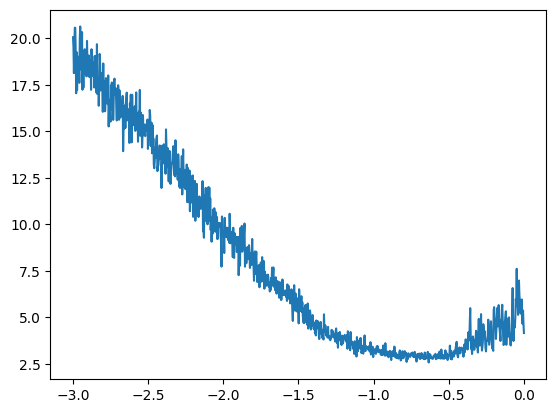

In [39]:
plt.plot(lri, losses) # Learning Rate around 10**-1 = 0.1

#### Use Train, Def/Validation, and Test Splits

In [40]:
def build_dataset(words):
    block_size = 3

    X, Y = [], []

    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
            
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

import random
random.seed(42)

random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

X_train , Y_train = build_dataset(words[:n1])
X_val, Y_val = build_dataset(words[n1:n2])
X_test, Y_test = build_dataset(words[n2:])


In [41]:
seed = 2147483647

g = torch.Generator().manual_seed(seed)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn(6, 300, generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)

 
parameters = [C, W1, b1, W2, b2]

In [42]:
# Add multiple minibatches
steps=[]
losses=[]
for p in parameters:
    p.requires_grad = True
    
for i in range(1000):
    
    gix = torch.Generator().manual_seed(seed)
    # Construct Minibatch of 128 Names
    ix = torch.randint(0, X_train.shape[0], (128,), generator = gix)
    seed += 1
    
    # Forward Pass
    emb = C[X_train[ix]]
    h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1) 
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y_train[ix])  
    
    # Backward Pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # Update
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad
    # Stats
    steps.append(i)
    losses.append(loss.item())
#print(loss.item())


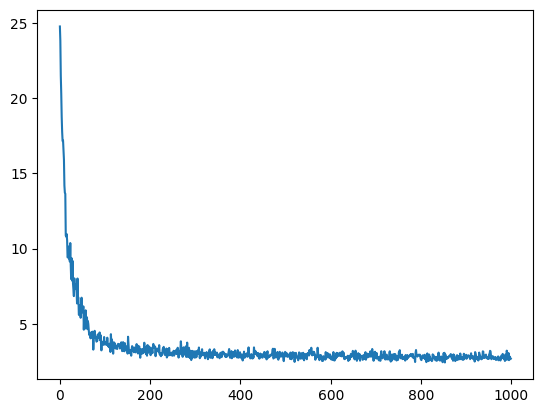

In [43]:
plt.plot(steps, losses)

In [44]:
emb = C[X_train]  
h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1) 
logits = h @ W2 + b2
loss_dev = F.cross_entropy(logits, Y_train) 
loss_dev

tensor(2.8031, grad_fn=<NllLossBackward0>)

In [45]:
emb = C[X_val]  
h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1) 
logits = h @ W2 + b2
loss_dev = F.cross_entropy(logits, Y_val) 
loss_dev

tensor(2.7910, grad_fn=<NllLossBackward0>)

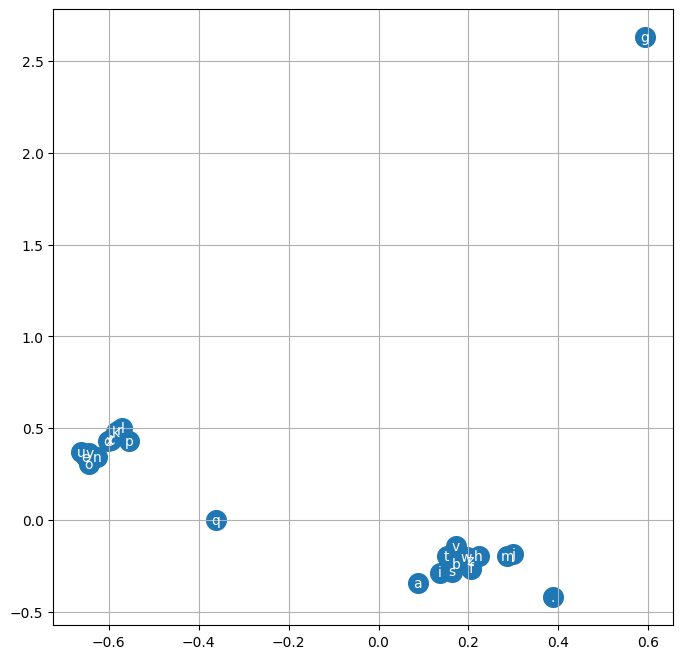

In [46]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

#### Increase Imeddings

In [47]:
def build_dataset(words):
    block_size = 3

    X, Y = [], []

    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
            
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

import random
random.seed(42)

random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

X_train , Y_train = build_dataset(words[:n1])
X_val, Y_val = build_dataset(words[n1:n2])
X_test, Y_test = build_dataset(words[n2:])



seed = 2147483647

g = torch.Generator().manual_seed(seed)
C = torch.randn((27, 20), generator=g)
W1 = torch.randn(60, 500, generator=g)
b1 = torch.randn(500, generator=g)
W2 = torch.randn((500, 27), generator=g)
b2 = torch.randn(27, generator=g)

 
parameters = [C, W1, b1, W2, b2]

# Add multiple minibatches
steps=[]
losses=[]



In [48]:
for p in parameters:
    p.requires_grad = True
    
for i in range(100000):
    
    gix = torch.Generator().manual_seed(seed)
    # Construct Minibatch of 128 Names
    ix = torch.randint(0, X_train.shape[0], (512,), generator = gix)
    seed += 1
    
    # Forward Pass
    emb = C[X_train[ix]]
    h = torch.tanh(emb.view(emb.shape[0],60) @ W1 + b1) 
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y_train[ix])  
    
    # Backward Pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # Update
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad
    # Stats

    steps.append(i)
    losses.append(loss.log10().item())
    #print(len(steps),len(losses))
#print(loss.item())

In [49]:
len(steps), len(losses)

(100000, 100000)

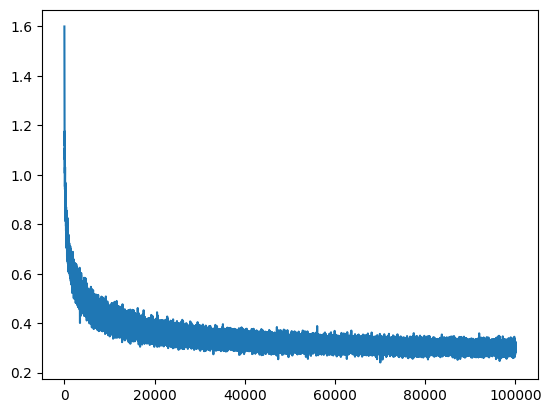

In [50]:
plt.plot(steps, losses)

In [51]:
emb = C[X_train]  
h = torch.tanh(emb.view(emb.shape[0],60) @ W1 + b1) 
logits = h @ W2 + b2
loss_dev = F.cross_entropy(logits, Y_train) 
loss_dev

tensor(1.9962, grad_fn=<NllLossBackward0>)

In [52]:
emb = C[X_test]  
h = torch.tanh(emb.view(emb.shape[0],60) @ W1 + b1) 
logits = h @ W2 + b2
loss_dev = F.cross_entropy(logits, Y_test) 
loss_dev

tensor(2.2972, grad_fn=<NllLossBackward0>)

In [53]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 1000)
block_size = 3

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

naitarajvia.
ais.
aj.
jona.
masophia.
jacaraahi.
suri.
kariffarh.
rayden.
samerezwilly.
avie.
merajh.
ille.
asing.
zaelis.
almera.
taliyn.
jaydin.
kyley.
anna.


#### Add another layer